In [ ]:
# Install Hugging Face transformers and datasets
!pip install transformers datasets
# Install SpaCy for NER visualization
!pip install spacy
!pip install spacy transformers

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

# Load NER model (Hugging Face model fine-tuned on CONLL03 dataset)
ner_tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english")
ner_model = AutoModelForTokenClassification.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english")

# Create a NER pipeline
ner_pipeline = pipeline("ner", model=ner_model, tokenizer=ner_tokenizer)

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

In [ ]:
def preprocess_text(text):
    # Remove unwanted characters like newlines, tabs
    text = text.replace('\n', ' ').replace('\r', '')
    # Further cleaning can be done based on your document structure
    return text

# Example of legal document text
legal_text = """The case of Mr. John Doe was decided in the Supreme Court of India on 15th March 2023. The judgment
                awarded damages to the plaintiff based on contractual breaches."""
clean_text = preprocess_text(legal_text)

In [ ]:
ner_results = ner_pipeline(clean_text)
# Display NER results
for entity in ner_results:
    print(f"Entity: {entity['word']}, Label: {entity['entity']}, Score: {entity['score']}")

Entity: John, Label: I-PER, Score: 0.9979392886161804
Entity: Do, Label: I-PER, Score: 0.9911788105964661
Entity: ##e, Label: I-PER, Score: 0.9837744235992432
Entity: Supreme, Label: I-ORG, Score: 0.9963158965110779
Entity: Court, Label: I-ORG, Score: 0.9936709403991699
Entity: of, Label: I-ORG, Score: 0.9833186864852905
Entity: India, Label: I-ORG, Score: 0.9563530683517456


In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration

# Load the pre-trained BART model for summarization
bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
bart_model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')

def summarize_text(text):
    # Tokenize the input text
    inputs = bart_tokenizer(text, return_tensors='pt', max_length=1024, truncation=True)

    # Generate summary
    summary_ids = bart_model.generate(inputs['input_ids'], num_beams=4, max_length=150, early_stopping=True)

    # Decode and return the summary
    return bart_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Summarize the clean legal text
summary = summarize_text(clean_text)
print("Summary of the Document:")
print(summary)

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.55k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.51G [00:00<?, ?B/s]

Summary of the Document:
The case of Mr. John Doe was decided in the Supreme Court of India on 15th March 2023. The judgment awarded damages to the plaintiff based on contractual breaches. The case was heard by a jury of seven men and three women. The jury decided that the plaintiff should be awarded damages for his breach of contract. The verdict was delivered by the jury of six men and two women.


In [ ]:
# Load rhetorical role classification model
# Use a valid model name from Hugging Face model hub
!pip install scipy
from transformers import AutoModelForSequenceClassification

# Replace 'model-name' with a real model from Hugging Face Hub
rhetorical_model = AutoModelForSequenceClassification.from_pretrained('nlpaueb/legal-bert-base-uncased')

# Define a pipeline for rhetorical classification (if model is available)
rhetorical_pipeline = pipeline("text-classification", model=rhetorical_model, tokenizer=ner_tokenizer)

# Example of classifying sections of legal text
rhetorical_result = rhetorical_pipeline(clean_text)
print("Rhetorical Classification Results:", rhetorical_result)

Downloading:   0%|          | 0.00/0.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at nlpaueb/legal-bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification wer

Rhetorical Classification Results: [{'label': 'LABEL_1', 'score': 0.5548890233039856}]


In [ ]:
import spacy
from spacy import displacy

# Load SpaCym odel (we will use the NER results from our previous pipeline)
nlp = spacy.blank("en")

# Create a doc object from the NER results
doc = nlp(clean_text)

# Add entities to the document
for ent in ner_results:
    start = ent['start']
    end = ent['end']
    label = ent['entity']
    # Check if the span indices are valid before creating a span object
    if start is not None and end is not None and start < len(doc.text) and end <= len(doc.text):
        span = doc.char_span(start, end, label=label)
        if span is not None:  # Only add valid spans to doc.ents
            doc.ents = list(doc.ents) + [span]

# Visualize the entities using displacy
displacy.render(doc, style="ent", jupyter=True)

In [ ]:
import urllib
import matplotlib.pyplot as plt
from collections import Counter
# Load pre-trained models for NER
ner_tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english")
ner_model = AutoModelForTokenClassification.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english")
ner_pipeline = pipeline("ner", model=ner_model, tokenizer=ner_tokenizer)

# Load text from file or URL
def load_text_from_file(file_path=None, url=None):
    if url:
        return urllib.request.urlopen(url).read().decode()
    elif file_path:
        with open(file_path, 'r') as file:
            return file.read()
    else:
        raise ValueError("Provide either a file path or a URL.")

# Load legal text
text_url = 'https://raw.githubusercontent.com/OpenNyAI/Opennyai/master/samples/sample_judgment1.txt'
legal_text = load_text_from_file(url=text_url)

# Preprocess text
def preprocess_text(text):
    return text.replace('\n', ' ').replace('\r', '')

clean_text = preprocess_text(legal_text)

# Apply NER
ner_results = ner_pipeline(clean_text)

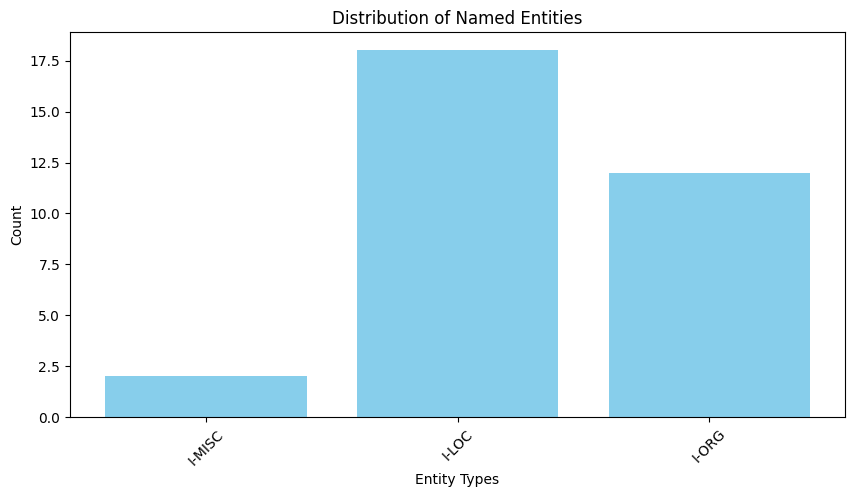

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt
from collections import Counter

# Extract entity labels
entities = [entity['entity'] for entity in ner_results]

# Count the occurrences of each entity
entity_counts = Counter(entities)

# Plotting the data
plt.figure(figsize=(10, 5))
plt.bar(entity_counts.keys(), entity_counts.values(), color='skyblue')
plt.title('Distribution of Named Entities')
plt.xlabel('Entity Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Step 1: Install packages (run this separately)
!pip install transformers datasets matplotlib keybert textblob
!pip install spacy
!pip install spacy transformers
!pip install torchvision # Ensure torchvision is explicitly installed

  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sqlalchemy 2.0.35 requires typing-extensions>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.
pydantic-core 2.23.4 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
spacy-transformers 1.1.7 requires transformers<4.21.

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


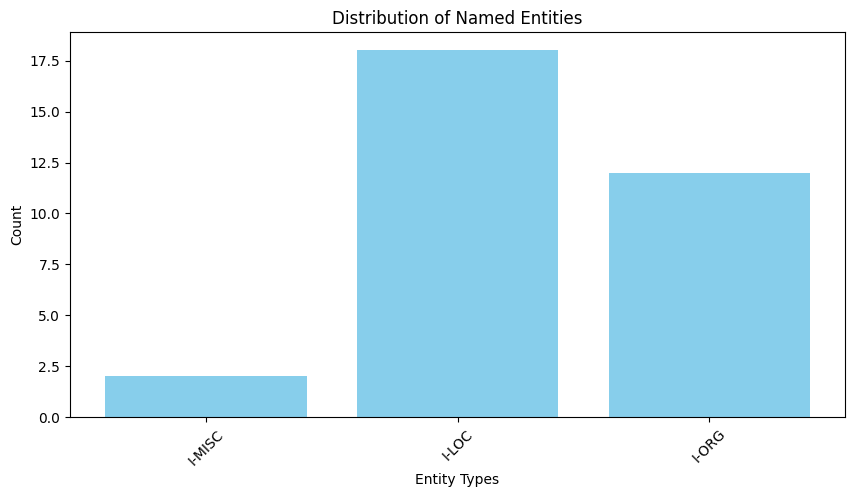

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Key Phrases:
Phrase: tribunal, Score: 0.4316
Phrase: appellate, Score: 0.4056
Phrase: appeal, Score: 0.3783
Phrase: upheld, Score: 0.3462
Phrase: arbitration, Score: 0.342
Sentiment Analysis:
Polarity: 0.07492131955635602 (Range: -1 to 1)
Subjectivity: 0.39685799601857985 (Range: 0 to 1)
Extracted Relationships:


In [ ]:
# Step 2: Import libraries
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline
import urllib
import matplotlib.pyplot as plt
from collections import Counter
from keybert import KeyBERT
from textblob import TextBlob

# Load pre-trained models for NER
ner_tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english")
ner_model = AutoModelForTokenClassification.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english")
ner_pipeline = pipeline("ner", model=ner_model, tokenizer=ner_tokenizer)

# Load text from file or URL
def load_text_from_file(file_path=None, url=None):
    if url:
        return urllib.request.urlopen(url).read().decode()
    elif file_path:
        with open(file_path, 'r') as file:
            return file.read()
    else:
        raise ValueError("Provide either a file path or a URL.")

# Load legal text
text_url = 'https://raw.githubusercontent.com/OpenNyAI/Opennyai/master/samples/sample_judgment1.txt'
legal_text = load_text_from_file(url=text_url)

# Preprocess text
def preprocess_text(text):
    return text.replace('\n', ' ').replace('\r', '')

clean_text = preprocess_text(legal_text)

# Apply NER
ner_results = ner_pipeline(clean_text)

# Visualize Named Entity Distribution
entities = [entity['entity'] for entity in ner_results]
entity_counts = Counter(entities)

plt.figure(figsize=(10, 5))
plt.bar(entity_counts.keys(), entity_counts.values(), color='skyblue')
plt.title('Distribution of Named Entities')
plt.xlabel('Entity Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Key Phrase Extraction
kw_model = KeyBERT()
key_phrases = kw_model.extract_keywords(clean_text, top_n=5)
print("Key Phrases:")
for phrase in key_phrases:
    print(f"Phrase: {phrase[0]}, Score: {phrase[1]}")

# Sentiment Analysis
blob = TextBlob(clean_text)
sentiment = blob.sentiment
print(f"Sentiment Analysis:")
print(f"Polarity: {sentiment.polarity} (Range: -1 to 1)")
print(f"Subjectivity: {sentiment.subjectivity} (Range: 0 to 1)")

# Relationship Extraction
def extract_relationships(text):
    relationships = []
    if "vs." in text:
        parts = text.split("vs.")
        relationships.append({"Plaintiff": parts[0].strip(), "Defendant": parts[1].strip()})
    return relationships

relationships = extract_relationships(clean_text)
print("Extracted Relationships:")
for rel in relationships:
    print(rel)

# Optional: Rhetorical Role Classification (if model is available)
# rhetorical_result = rhetorical_pipeline(clean_text)
# print("Rhetorical Classification Results:", rhetorical_result)